In [1]:
#importing Essential libraries for data exploration and loading the data
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



In [2]:
#importing function file for loading the data:
from data_loading_function import load_data
        
        

In [3]:
#Describing folder path where input files reside
base_path = "/Users/vkadava/Desktop/PROJECT3/snli_1.0/"

In [4]:
# Loading the datasets:

train_data = load_data(base_path,'snli_1.0_train','jsonl')
dev_data = load_data(base_path,'snli_1.0_dev','jsonl')
test_data = load_data(base_path,'snli_1.0_test','jsonl')


# Exploratory Data analysis:

checking if any entity in each dataset has null value:

In [5]:
train_data.isna().sum()

annotator_labels          0
captionID                 0
gold_label                0
pairID                    0
sentence1                 0
sentence1_binary_parse    0
sentence1_parse           0
sentence2                 0
sentence2_binary_parse    0
sentence2_parse           0
dtype: int64

In [6]:
dev_data.isna().sum()

annotator_labels          0
captionID                 0
gold_label                0
pairID                    0
sentence1                 0
sentence1_binary_parse    0
sentence1_parse           0
sentence2                 0
sentence2_binary_parse    0
sentence2_parse           0
dtype: int64

In [7]:
test_data.isna().sum()

annotator_labels          0
captionID                 0
gold_label                0
pairID                    0
sentence1                 0
sentence1_binary_parse    0
sentence1_parse           0
sentence2                 0
sentence2_binary_parse    0
sentence2_parse           0
dtype: int64

Distribution of frequencies of gold labels in train,test,dev data sets:

<Axes: xlabel='gold_label', ylabel='count'>

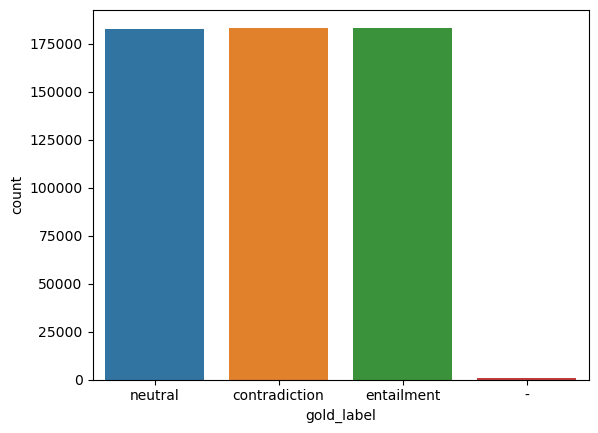

In [8]:

sns.countplot(x="gold_label", data=train_data)


<Axes: xlabel='gold_label', ylabel='count'>

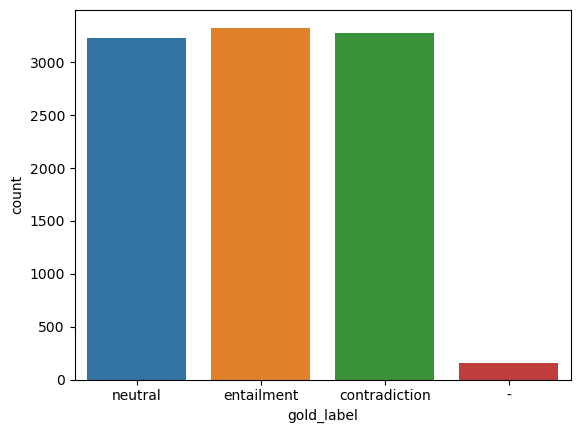

In [9]:
sns.countplot(x="gold_label", data=dev_data)


<Axes: xlabel='gold_label', ylabel='count'>

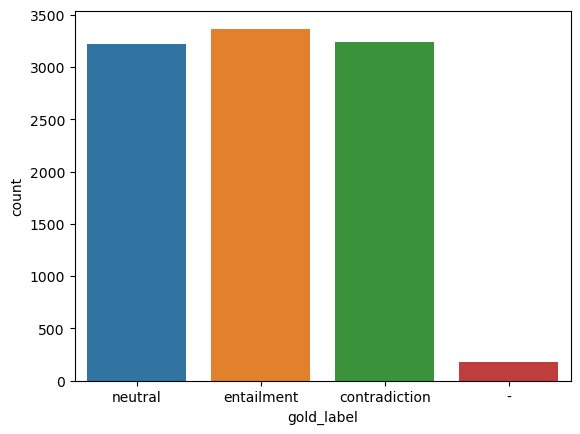

In [10]:
sns.countplot(x="gold_label", data=test_data)



Analyzing the length of texts in each dataset:

In [11]:
 
train_data["premise_length"] = train_data["sentence1"].apply(len)
train_data["hypothesis_length"] = train_data["sentence2"].apply(len)
dev_data["premise_length"] = dev_data["sentence1"].apply(len)
dev_data["hypothesis_length"] = dev_data["sentence2"].apply(len)
test_data["premise_length"] = test_data["sentence1"].apply(len)
test_data["hypothesis_length"] = test_data["sentence2"].apply(len)


<Axes: xlabel='premise_length', ylabel='Count'>

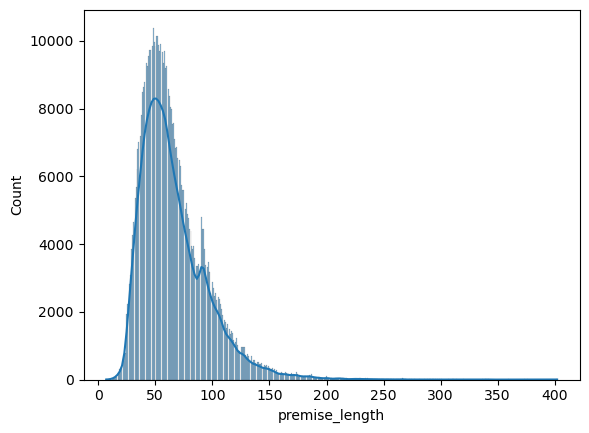

In [12]:
sns.histplot(data=train_data, x="premise_length", kde=True)


<Axes: xlabel='hypothesis_length', ylabel='Count'>

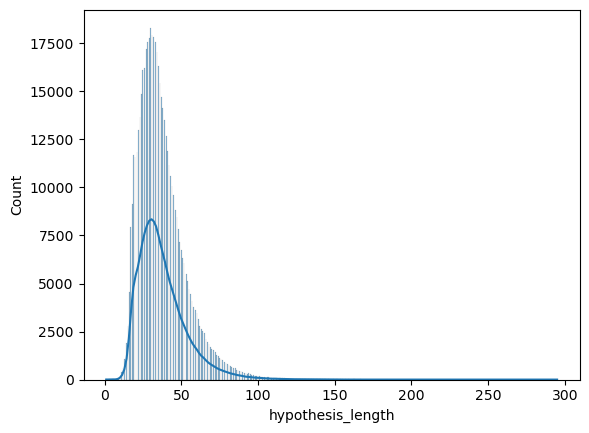

In [13]:
sns.histplot(data=train_data, x="hypothesis_length", kde=True)



<Axes: xlabel='premise_length', ylabel='Count'>

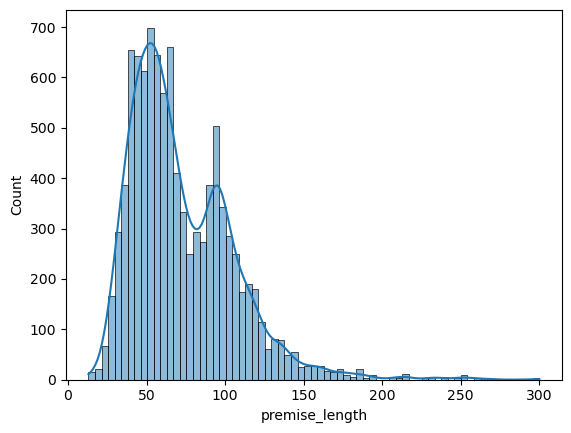

In [14]:
sns.histplot(data=dev_data, x="premise_length", kde=True)


<Axes: xlabel='hypothesis_length', ylabel='Count'>

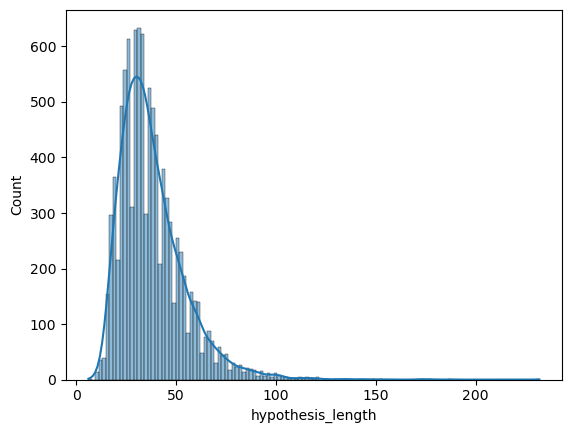

In [15]:
sns.histplot(data=dev_data, x="hypothesis_length", kde=True)


<Axes: xlabel='premise_length', ylabel='Count'>

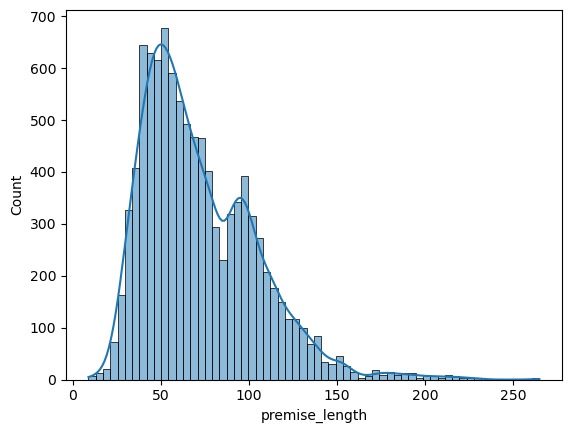

In [16]:
sns.histplot(data=test_data, x="premise_length", kde=True)


<Axes: xlabel='hypothesis_length', ylabel='Count'>

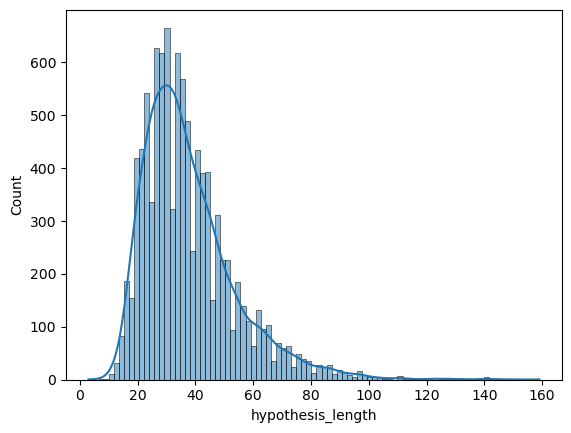

In [17]:
sns.histplot(data=test_data, x="hypothesis_length", kde=True)


In [18]:
# Identifying common patterns in each dataset
train_data["premise_tokens"] = train_data["sentence1"].apply(word_tokenize)
train_data["hypothesis_tokens"] = train_data["sentence2"].apply(word_tokenize)
dev_data["premise_tokens"] = dev_data["sentence1"].apply(word_tokenize)
dev_data["hypothesis_tokens"] = dev_data["sentence2"].apply(word_tokenize)
test_data["premise_tokens"] = test_data["sentence1"].apply(word_tokenize)
test_data["hypothesis_tokens"] = test_data["sentence2"].apply(word_tokenize)
train_premise_words = nltk.FreqDist([word for premise in train_data["premise_tokens"] for word in premise])
train_hypothesis_words = nltk.FreqDist([word for hypothesis in train_data["hypothesis_tokens"] for word in hypothesis])
dev_premise_words = nltk.FreqDist([word for premise in dev_data["premise_tokens"] for word in premise])
dev_hypothesis_words = nltk.FreqDist([word for hypothesis in dev_data["hypothesis_tokens"] for word in hypothesis])
test_premise_words = nltk.FreqDist([word for premise in test_data["premise_tokens"] for word in premise])
test_hypothesis_words = nltk.FreqDist([word for hypothesis in test_data["hypothesis_tokens"] for word in hypothesis])
print("Most common words in train premises:", train_premise_words.most_common(10))
print("Most common words in train hypotheses:", train_hypothesis_words.most_common(10))
print("Most common words in dev premises:", dev_premise_words.most_common(10))
print("Most common words in dev hypotheses:", dev_hypothesis_words.most_common(10))
print("Most common words in test premises:", test_premise_words.most_common(10))
print("Most common words in test hypotheses:", test_hypothesis_words.most_common(10))

Most common words in train premises: [('a', 658695), ('.', 524199), ('A', 311775), ('in', 300774), ('the', 213636), ('and', 169659), ('on', 165228), ('is', 149028), ('man', 144201), ('of', 141912)]
Most common words in train hypotheses: [('.', 439900), ('a', 264848), ('is', 224926), ('A', 205757), ('the', 156771), ('The', 143992), ('are', 127103), ('man', 112502), ('in', 105592), ('on', 70260)]
Most common words in dev premises: [('a', 12788), ('.', 9532), ('in', 6105), ('A', 5917), ('the', 4236), ('and', 3550), ('on', 3174), ('of', 2956), ('man', 2781), ('is', 2721)]
Most common words in dev hypotheses: [('.', 8079), ('a', 4952), ('is', 4104), ('A', 3810), ('the', 2774), ('The', 2628), ('are', 2284), ('man', 2074), ('in', 1969), ('on', 1355)]
Most common words in test premises: [('a', 12790), ('.', 9547), ('in', 6078), ('A', 5845), ('the', 4320), ('and', 3615), ('on', 3075), ('is', 2917), ('of', 2886), ('man', 2790)]
Most common words in test hypotheses: [('.', 7968), ('a', 5039), ('i

Insights:
1)From hist plots we can observe that all three(train,dev,test) sets are almost balanced and requirement to decrease/increase samples is not needed.
2)since Most common words are 'stop words' in all datsets,it is essential to remove them while preprocessing to reduce noise and enable ML model to learn useful relation between features.